In [54]:
import pandas as pnd
import seaborn as sb
import numpy as np
import statsmodels.api as stm
import matplotlib.pyplot as mtplt
df = pnd.read_csv("//Users//tejaswinienugala//Desktop//updated_car_purchase_dataset.csv")
df.head()

,Name,Age,AnnualIncome,Debt,Savings,EducationLevel,EmploymentStatus,MaritalStatus,HouseholdSize,YearsInCurrentJob,HasChildren,HomeOwnership,Location,CreditHistory,DrivingExperience,MonthlyExpenses,EmploymentType,LoanApprovalHistory,HealthCondition,ProbabilityOfCarPurchase
0,Customer1,56,35287,6570,48563,High School,Unemployed,Married,3,7,0,Own,Urban,Excellent,10.590050,3595.832781,Contract,Approved,Fair,0.071711
1,Customer2,46,64387,3249,26390,High School,Self-Employed,Divorced,1,10,0,Rent,Rural,Fair,3.841437,4066.055011,Part-Time,Denied,Fair,0.043561
2,Customer3,32,38512,9110,23128,Bachelor,Employed,Divorced,1,4,0,Own,Suburban,Excellent,2.972948,1880.574274,Contract,Approved,Poor,0.217257
3,Customer4,60,31342,40363,13489,College,Employed,Married,5,9,1,Own,Urban,Excellent,3.347877,662.168199,Full-Time,Approved,Poor,0.971072
4,Customer5,25,93076,13605,38314,Master,Employed,Married,4,10,0,Own,Rural,Excellent,2.919537,4697.506061,Full-Time,Denied,Good,0.979238


In [55]:
df.columns

Index(['Name', 'Age', 'AnnualIncome', 'Debt', 'Savings', 'EducationLevel',
       'EmploymentStatus', 'MaritalStatus', 'HouseholdSize',
       'YearsInCurrentJob', 'HasChildren', 'HomeOwnership', 'Location',
       'CreditHistory', 'DrivingExperience', 'MonthlyExpenses',
       'EmploymentType', 'LoanApprovalHistory', 'HealthCondition',
       'ProbabilityOfCarPurchase'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   AnnualIncome              1000 non-null   int64  
 3   Debt                      1000 non-null   int64  
 4   Savings                   1000 non-null   int64  
 5   EducationLevel            1000 non-null   object 
 6   EmploymentStatus          1000 non-null   object 
 7   MaritalStatus             1000 non-null   object 
 8   HouseholdSize             1000 non-null   int64  
 9   YearsInCurrentJob         1000 non-null   int64  
 10  HasChildren               1000 non-null   int64  
 11  HomeOwnership             1000 non-null   object 
 12  Location                  1000 non-null   object 
 13  CreditHistory             1000 non-null   object 
 14  DrivingEx

In [57]:
print(df.shape)

(1000, 20)


In [58]:
print(df.dtypes)

Name                         object
Age                           int64
AnnualIncome                  int64
Debt                          int64
Savings                       int64
EducationLevel               object
EmploymentStatus             object
MaritalStatus                object
HouseholdSize                 int64
YearsInCurrentJob             int64
HasChildren                   int64
HomeOwnership                object
Location                     object
CreditHistory                object
DrivingExperience           float64
MonthlyExpenses             float64
EmploymentType               object
LoanApprovalHistory          object
HealthCondition              object
ProbabilityOfCarPurchase    float64
dtype: object


In [59]:
print(df.describe())

               Age   AnnualIncome          Debt       Savings  HouseholdSize  \
count  1000.000000    1000.000000   1000.000000   1000.000000    1000.000000   
mean     40.986000   75126.753000  25555.241000  23960.598000       3.033000   
std      13.497852   25935.705085  14147.217856  14403.707749       1.417717   
min      18.000000   30060.000000     97.000000    138.000000       1.000000   
25%      29.000000   53860.750000  12897.750000  11426.750000       2.000000   
50%      42.000000   74775.500000  26194.500000  23099.500000       3.000000   
75%      52.000000   98028.750000  37482.500000  36277.000000       4.000000   
max      64.000000  119899.000000  49927.000000  49879.000000       5.000000   

       YearsInCurrentJob  HasChildren  DrivingExperience  MonthlyExpenses  \
count         1000.00000  1000.000000        1000.000000      1000.000000   
mean             5.55100     0.501000          10.321714      2786.868100   
std              2.91889     0.500249           

In [60]:
df.isnull().sum()

Name                        0
Age                         0
AnnualIncome                0
Debt                        0
Savings                     0
EducationLevel              0
EmploymentStatus            0
MaritalStatus               0
HouseholdSize               0
YearsInCurrentJob           0
HasChildren                 0
HomeOwnership               0
Location                    0
CreditHistory               0
DrivingExperience           0
MonthlyExpenses             0
EmploymentType              0
LoanApprovalHistory         0
HealthCondition             0
ProbabilityOfCarPurchase    0
dtype: int64

In [147]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the absolute correlation values with respect to 'ProbabilityOfCarPurchase'
correlation_with_target = correlation_matrix['ProbabilityOfCarPurchase'].abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Select the top 5 features (excluding 'ProbabilityOfCarPurchase' itself)
best_5_fields = sorted_correlation[1:10].index.tolist()

# Display the top 5 fields
print("Best 10 fields:")
print(best_5_fields)

Best 10 fields:
['Age', 'Debt', 'HouseholdSize', 'Savings', 'YearsInCurrentJob', 'HasChildren', 'DrivingExperience', 'AnnualIncome', 'MonthlyExpenses']


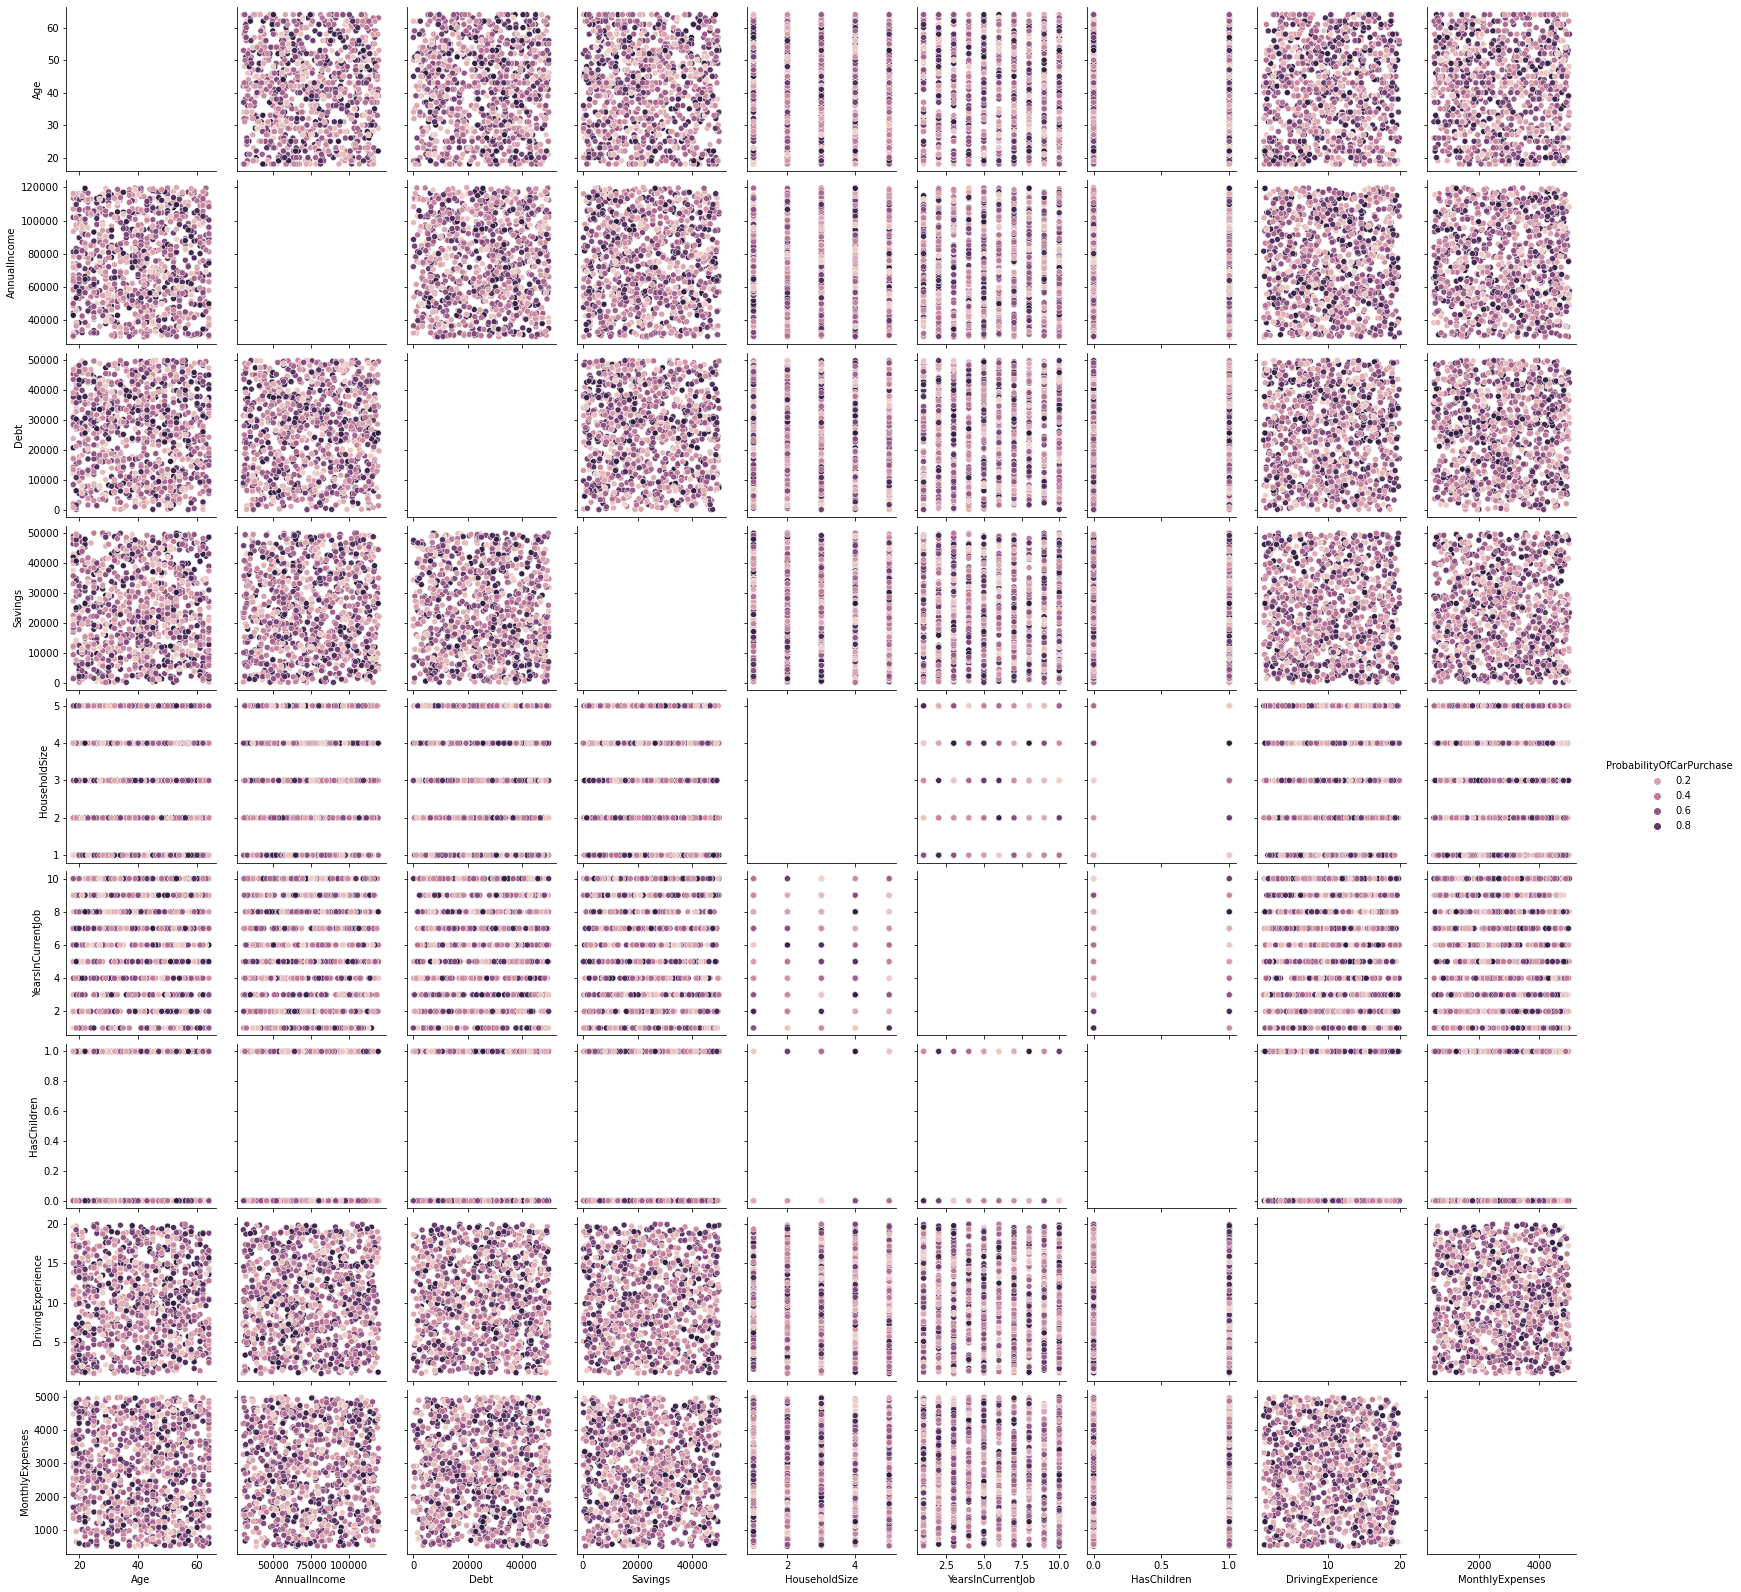

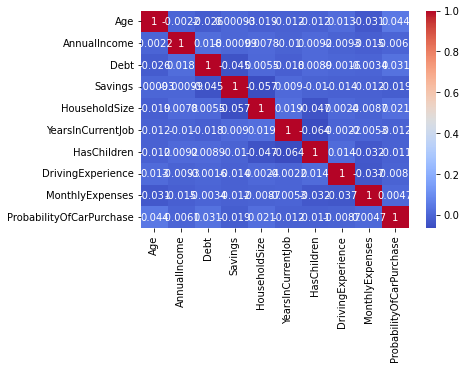

In [62]:
# display the Pairplot to visualize the  relationships 
sb.pairplot(df, hue='ProbabilityOfCarPurchase')
mtplt.show()

# visualize the Correlation matrix heatmap
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
mtplt.show()


# Age Influence on the ProbabilityOfCarPurchase

In [63]:
df['Age'].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63])

<AxesSubplot:xlabel='Age', ylabel='Density'>

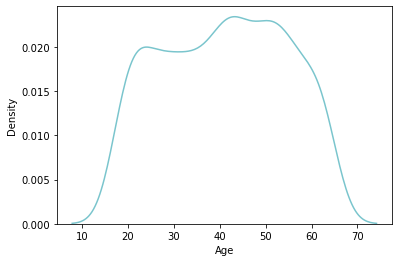

In [64]:
#Normality Assesment
sb.kdeplot(x=df['Age'],color="#7AC5CD")

In [65]:
df['Age'].min()

18

In [66]:
df['Age'].max()

64

<AxesSubplot:xlabel='Age', ylabel='ProbabilityOfCarPurchase'>

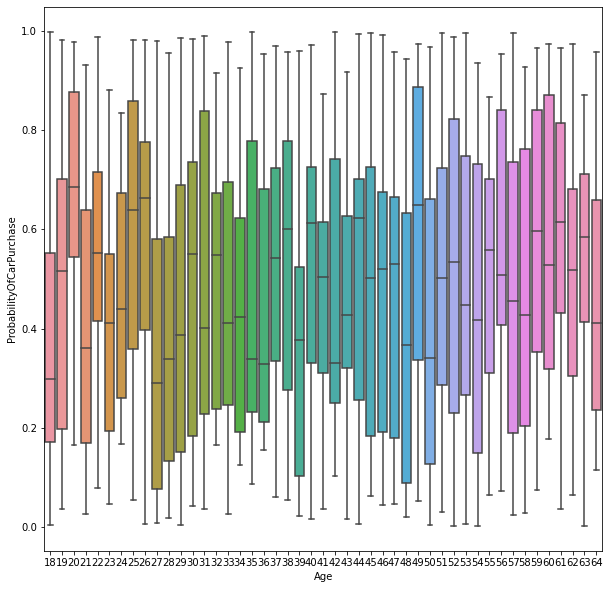

In [67]:
mtplt.figure(figsize=(10,10))
sb.boxplot(x=df['Age'],y=df['ProbabilityOfCarPurchase'])

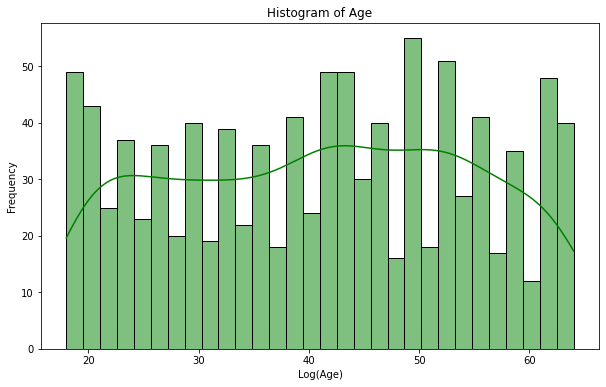

In [68]:
mtplt.figure(figsize=(10, 6))
sb.histplot(df['Age'], bins=30, kde=True, color='green')
mtplt.title('Histogram of Age')
mtplt.xlabel('Log(Age)')
mtplt.ylabel('Frequency')
mtplt.show()



<AxesSubplot:xlabel='Age', ylabel='ProbabilityOfCarPurchase'>

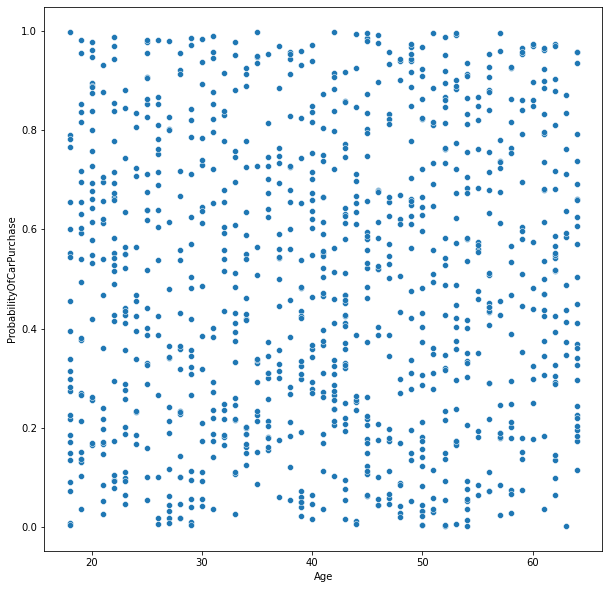

In [69]:
mtplt.figure(figsize=(10,10))
sb.scatterplot(x=df['Age'],y=df['ProbabilityOfCarPurchase'])

<AxesSubplot:title={'center':'Frequency graph of Age'}, xlabel='Age', ylabel='Frequency'>

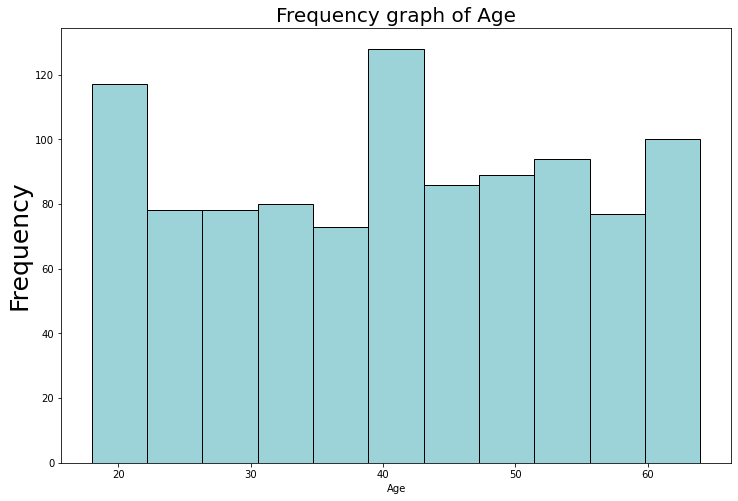

In [70]:

mtplt.figure(figsize=(12,8))
mtplt.ylabel('Frequency', fontsize=25)
mtplt.title('Frequency graph of Age', fontsize=20)
sb.histplot(x=df['Age'],color='#7AC5CD')

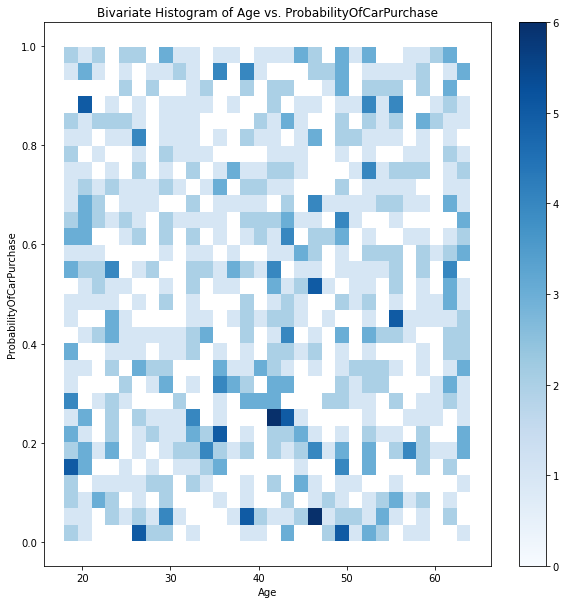

In [71]:
mtplt.figure(figsize=(10, 10))
sb.histplot(x=df['Age'], y=df['ProbabilityOfCarPurchase'], bins=30, cmap='Blues', cbar=True)
mtplt.title('Bivariate Histogram of Age vs. ProbabilityOfCarPurchase')
mtplt.xlabel('Age')
mtplt.ylabel('ProbabilityOfCarPurchase')
mtplt.show()


In [72]:
df['Age'].mean()

40.986

In [73]:
df['Age'].median()

42.0

In [74]:
df['Age'].std()

13.497851532595702

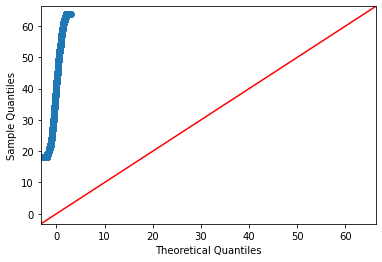

In [75]:
stm.qqplot(df['Age'], line ='45')
mtplt.show()

In [76]:
print(df['Age'].skew())

-0.046883220802412674


# Debt Influence on the ProbabilityOfCarPurchase

In [77]:
df['Debt'].unique()



array([ 6570,  3249,  9110, 40363, 13605, 12115, 39062, 22911, 38525,
       32556, 12595,  1969, 43753, 17275,  4470, 10225, 42324, 41974,
       42759, 23196, 40287, 13669, 37380, 45141, 48320, 47414, 38006,
       15577, 22473, 28625, 15504, 24089, 36487,   302, 31463, 44912,
       29259, 42823, 37208, 30659, 35840, 31890, 13598, 47055, 46733,
       19508, 42287, 13380, 26984, 44633,  8125, 36059,  4033, 37873,
       17087, 40901, 49726,  5704,  7848, 21592, 45743,  6924, 27208,
       19614,   488, 39882, 25923, 48508, 35941, 29165,  1667, 26213,
        4114, 36321,  7761, 31116, 33768, 48406, 25426, 17772, 38218,
        3712,  1367, 40957, 41781, 49606, 26200,  3726, 23616, 27723,
       37574, 34958,  9108, 12178, 35643, 31324, 38360, 17824, 45360,
        8927, 28144, 31010, 22443, 14437, 44298, 39778, 11207, 25537,
       35757, 12040, 41986, 22612, 28441,  6471, 35631, 43461, 26523,
       31348,  1177,  4760, 32779, 21636, 16353, 11556, 27598, 11563,
       46819, 43790,

<AxesSubplot:xlabel='Debt', ylabel='Density'>

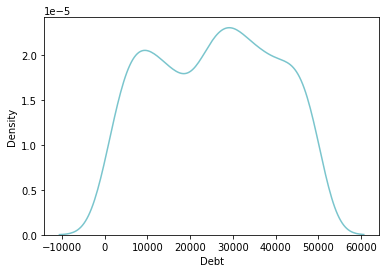

In [78]:
#Normality Assesment
sb.kdeplot(x=df['Debt'],color="#7AC5CD")



In [79]:
df['Debt'].min()


97

In [80]:
df['Debt'].max()



49927

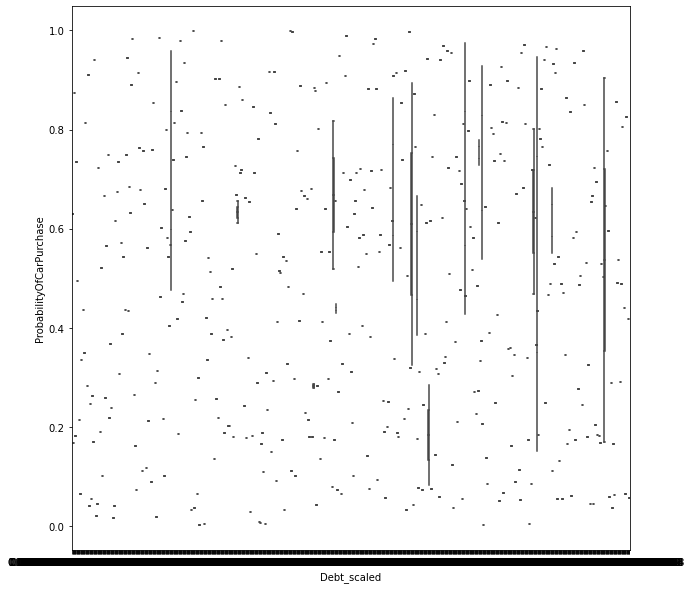

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to avoid modifying the original data
df_filtered = df.copy()

# Scale the 'Debt' values
scaler = MinMaxScaler()
df_filtered['Debt_scaled'] = scaler.fit_transform(df_filtered[['Debt']])

# Remove missing values, if any
df_filtered = df_filtered.dropna(subset=['Debt_scaled', 'ProbabilityOfCarPurchase'])

# Create boxplot
mtplt.figure(figsize=(10, 10))
sb.boxplot(x=df_filtered['Debt_scaled'], y=df_filtered['ProbabilityOfCarPurchase'])
mtplt.show()


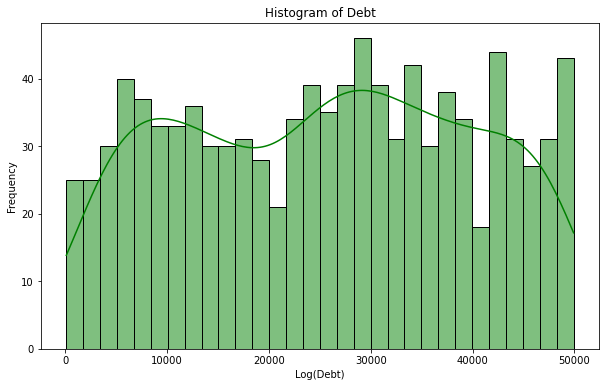

In [82]:
mtplt.figure(figsize=(10, 6))
sb.histplot(df['Debt'], bins=30, kde=True, color='green')
mtplt.title('Histogram of Debt')
mtplt.xlabel('Log(Debt)')
mtplt.ylabel('Frequency')
mtplt.show()



<AxesSubplot:xlabel='Debt', ylabel='ProbabilityOfCarPurchase'>

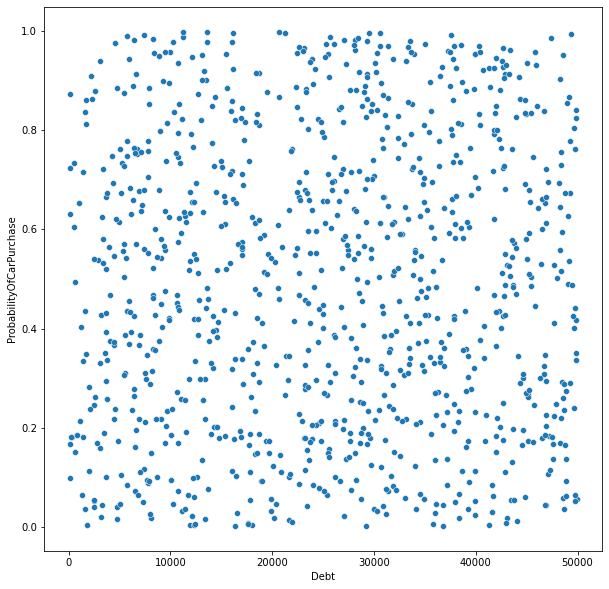

In [83]:

mtplt.figure(figsize=(10,10))
sb.scatterplot(x=df['Debt'],y=df['ProbabilityOfCarPurchase'])




<AxesSubplot:title={'center':'Frequency graph of Debt'}, xlabel='Debt', ylabel='Frequency'>

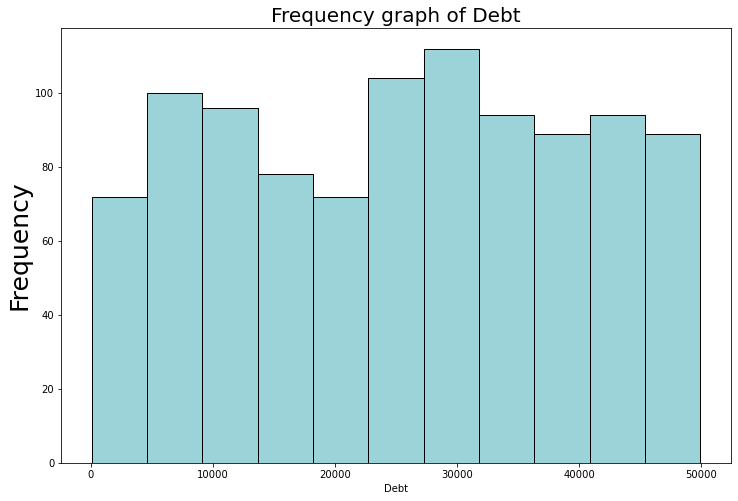

In [84]:

mtplt.figure(figsize=(12,8))
mtplt.ylabel('Frequency', fontsize=25)
mtplt.title('Frequency graph of Debt', fontsize=20)
sb.histplot(x=df['Debt'],color='#7AC5CD')



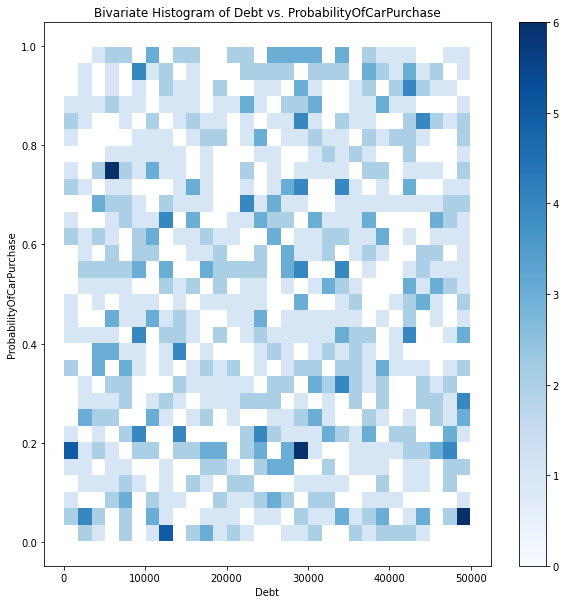

In [85]:

mtplt.figure(figsize=(10, 10))
sb.histplot(x=df['Debt'], y=df['ProbabilityOfCarPurchase'], bins=30, cmap='Blues', cbar=True)
mtplt.title('Bivariate Histogram of Debt vs. ProbabilityOfCarPurchase')
mtplt.xlabel('Debt')
mtplt.ylabel('ProbabilityOfCarPurchase')
mtplt.show()



In [86]:

df['Debt'].mean()




25555.241

In [87]:
df['Debt'].median()


26194.5

In [88]:
df['Debt'].std()

14147.21785560585

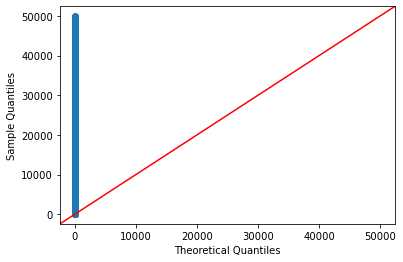

In [89]:

stm.qqplot(df['Debt'], line ='45')
mtplt.show()


In [90]:


print(df['Debt'].skew())

-0.03538583240281169


# HouseholdSize Influence on the ProbabilityOfCarPurchase

In [91]:
df['HouseholdSize'].unique()

array([3, 1, 5, 4, 2])

<AxesSubplot:xlabel='HouseholdSize', ylabel='Density'>

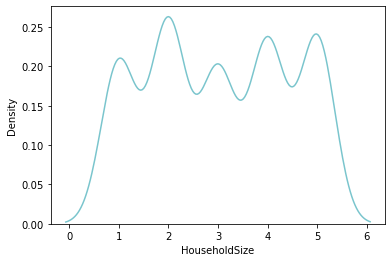

In [92]:
#Normality Assesment
sb.kdeplot(x=df['HouseholdSize'],color="#7AC5CD")

In [93]:
df['HouseholdSize'].min()

1

In [94]:
df['HouseholdSize'].max()

5

<AxesSubplot:xlabel='HouseholdSize', ylabel='ProbabilityOfCarPurchase'>

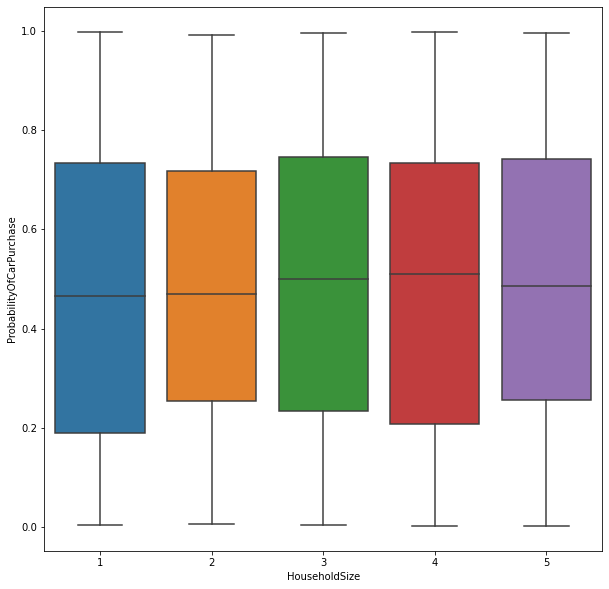

In [95]:
mtplt.figure(figsize=(10,10))
sb.boxplot(x=df['HouseholdSize'],y=df['ProbabilityOfCarPurchase'])

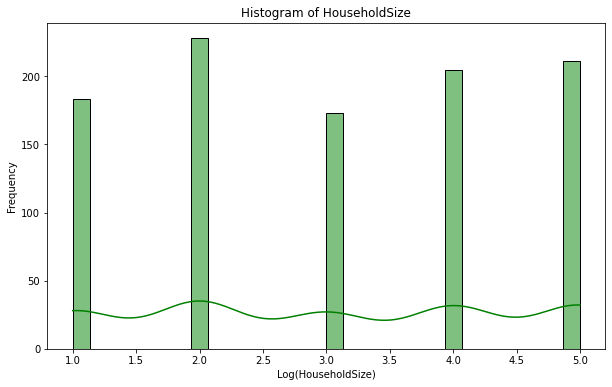

In [96]:
mtplt.figure(figsize=(10, 6))
sb.histplot(df['HouseholdSize'], bins=30, kde=True, color='green')
mtplt.title('Histogram of HouseholdSize')
mtplt.xlabel('Log(HouseholdSize)')
mtplt.ylabel('Frequency')
mtplt.show()

<AxesSubplot:xlabel='HouseholdSize', ylabel='ProbabilityOfCarPurchase'>

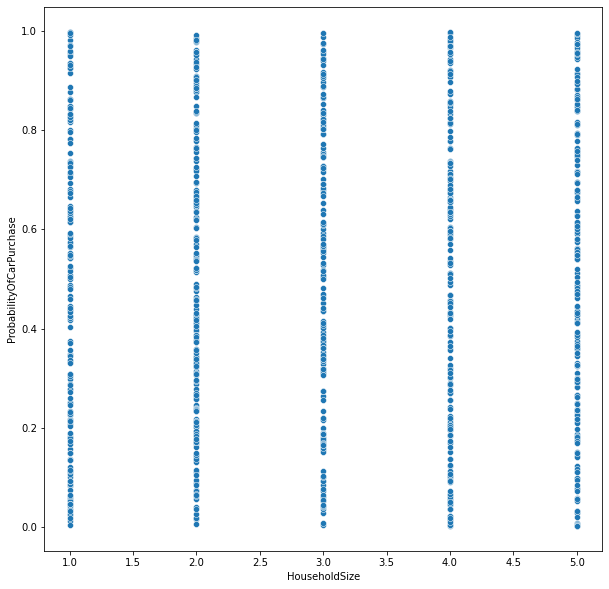

In [97]:
mtplt.figure(figsize=(10,10))
sb.scatterplot(x=df['HouseholdSize'],y=df['ProbabilityOfCarPurchase'])

<AxesSubplot:title={'center':'Frequency graph of HouseholdSize'}, xlabel='HouseholdSize', ylabel='Frequency'>

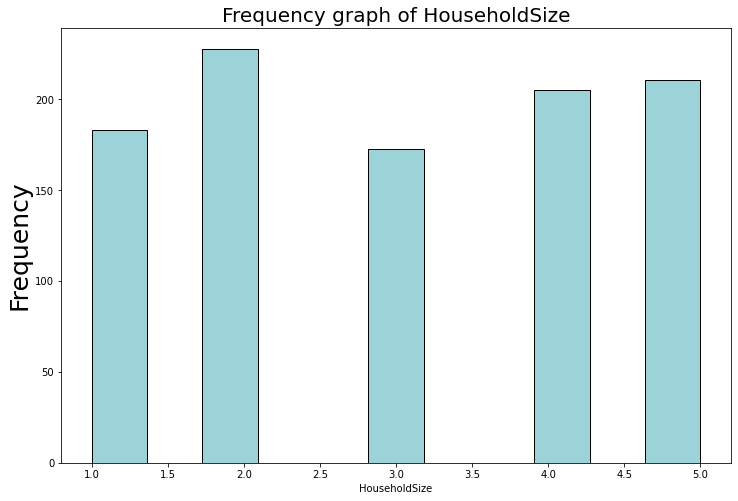

In [98]:

mtplt.figure(figsize=(12,8))
mtplt.ylabel('Frequency', fontsize=25)
mtplt.title('Frequency graph of HouseholdSize', fontsize=20)
sb.histplot(x=df['HouseholdSize'],color='#7AC5CD')

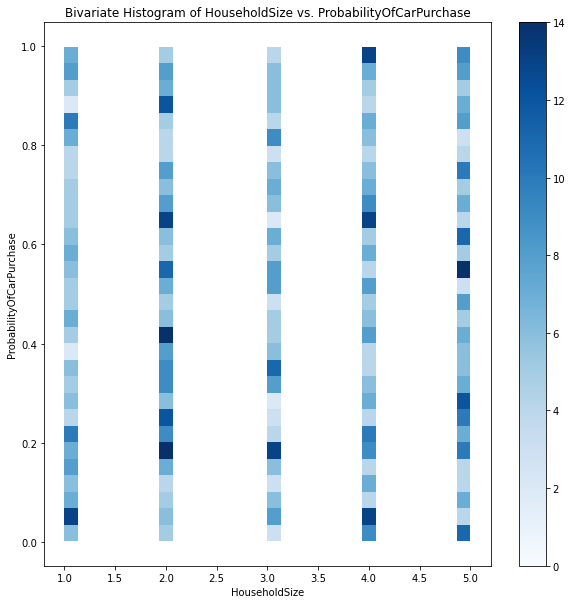

In [99]:

mtplt.figure(figsize=(10, 10))
sb.histplot(x=df['HouseholdSize'], y=df['ProbabilityOfCarPurchase'], bins=30, cmap='Blues', cbar=True)
mtplt.title('Bivariate Histogram of HouseholdSize vs. ProbabilityOfCarPurchase')
mtplt.xlabel('HouseholdSize')
mtplt.ylabel('ProbabilityOfCarPurchase')
mtplt.show()


In [100]:
df['HouseholdSize'].mean()

3.033

In [101]:
df['HouseholdSize'].median()

3.0

In [102]:
df['HouseholdSize'].std()

1.4177167985606018

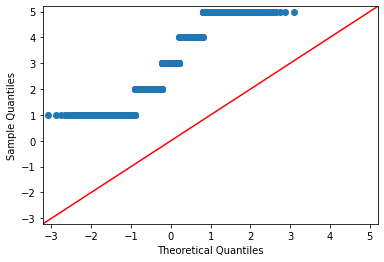

In [103]:

stm.qqplot(df['HouseholdSize'], line ='45')
mtplt.show()

In [104]:

print(df['HouseholdSize'].skew())

0.0007676550112820296


In [105]:
# Apply a square root transformation method  to the variable or field 'HouseholdSize'
df['HouseholdSize_sqrt'] = np.sqrt(df['HouseholdSize'])

# To Check the skewness of the transformed variable
skewness_household_size_sqrt = df['HouseholdSize_sqrt'].skew()
print(f"Skewness after Square Root Transformation: {skewness_household_size_sqrt}")

Skewness after Square Root Transformation: -0.27999114587929913


In [106]:
df['HouseholdSize_log'] = np.log1p(df['HouseholdSize'])

from scipy.stats import boxcox
df['HouseholdSize_boxcox'], lambda_value = boxcox(df['HouseholdSize'] + 1)

Text(0.5, 1.0, 'Histogram of Box-Cox Transformed HouseholdSize')

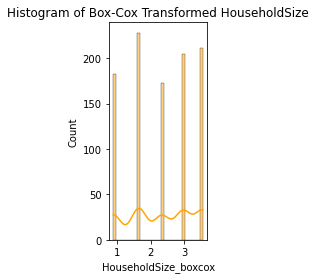

In [107]:
mtplt.subplot(1, 3, 2)
sb.histplot(df['HouseholdSize_boxcox'], bins=30, kde=True, color='orange')
mtplt.title('Histogram of Box-Cox Transformed HouseholdSize')


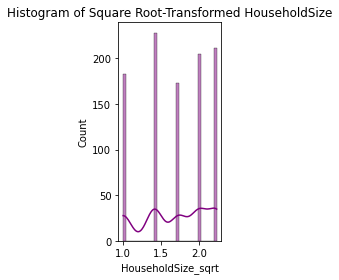

In [108]:

mtplt.subplot(1, 3, 3)
sb.histplot(df['HouseholdSize_sqrt'], bins=30, kde=True, color='purple')
mtplt.title('Histogram of Square Root-Transformed HouseholdSize')

mtplt.tight_layout()
mtplt.show()

In [109]:

# Calculate skewness of the additional transformations
skewness_household_size_log = df['HouseholdSize_log'].skew()
skewness_household_size_boxcox = df['HouseholdSize_boxcox'].skew()

print(f"Skewness after Log Transformation: {skewness_household_size_log}")
print(f"Skewness after Box-Cox Transformation: {skewness_household_size_boxcox}")

Skewness after Log Transformation: -0.39884381088097115
Skewness after Box-Cox Transformation: -0.11768988920488714


Text(0, 0.5, 'Frequency')

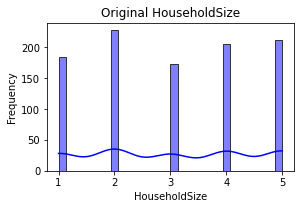

In [110]:
mtplt.figure(figsize=(15, 6))

# Original 'HouseholdSize'
mtplt.subplot(2, 3, 1)
sb.histplot(df['HouseholdSize'], bins=30, kde=True, color='blue')
mtplt.title('Original HouseholdSize')
mtplt.xlabel('HouseholdSize')
mtplt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

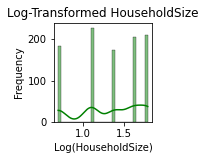

In [111]:
# Log-Transformed 'HouseholdSize'
mtplt.subplot(2, 3, 2)
sb.histplot(df['HouseholdSize_log'], bins=30, kde=True, color='green')
mtplt.title('Log-Transformed HouseholdSize')
mtplt.xlabel('Log(HouseholdSize)')
mtplt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

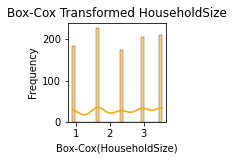

In [112]:
# Box-Cox Transformed 'HouseholdSize'
mtplt.subplot(2, 3, 3)
sb.histplot(df['HouseholdSize_boxcox'], bins=30, kde=True, color='orange')
mtplt.title('Box-Cox Transformed HouseholdSize')
mtplt.xlabel('Box-Cox(HouseholdSize)')
mtplt.ylabel('Frequency')



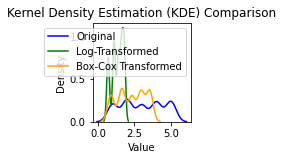

In [113]:
# KDE plots for comparison
mtplt.subplot(2, 3, 4)
sb.kdeplot(df['HouseholdSize'], color='blue', label='Original')
sb.kdeplot(df['HouseholdSize_log'], color='green', label='Log-Transformed')
sb.kdeplot(df['HouseholdSize_boxcox'], color='orange', label='Box-Cox Transformed')
mtplt.title('Kernel Density Estimation (KDE) Comparison')
mtplt.xlabel('Value')
mtplt.ylabel('Density')
mtplt.legend()



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


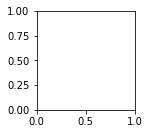

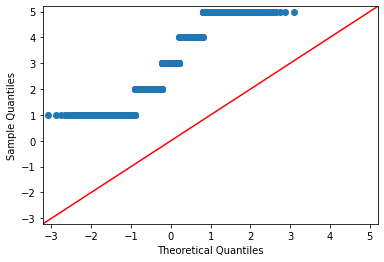

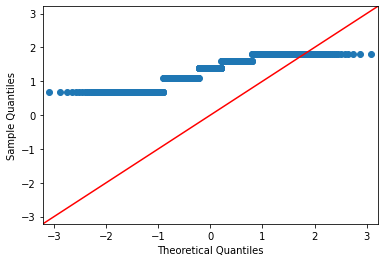

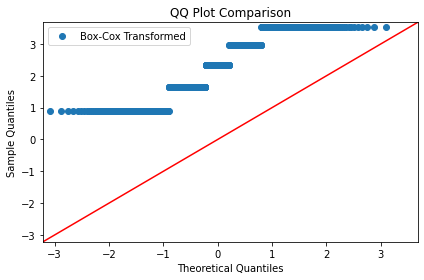

In [114]:
# QQ plots for comparison
mtplt.subplot(2, 3, 5)
stm.qqplot(df['HouseholdSize'], line='45', color='blue', label='Original')
stm.qqplot(df['HouseholdSize_log'], line='45', color='green', label='Log-Transformed')
stm.qqplot(df['HouseholdSize_boxcox'], line='45', color='orange', label='Box-Cox Transformed')
mtplt.title('QQ Plot Comparison')
mtplt.legend()

mtplt.tight_layout()
mtplt.show()

# Savings Influence on the ProbabilityOfCarPurchase

In [115]:
df['Savings'].min()

138

In [116]:
df['Savings'].max()

49879

In [117]:
df['Savings'].std()

14403.707749302723

<AxesSubplot:xlabel='Savings', ylabel='Density'>

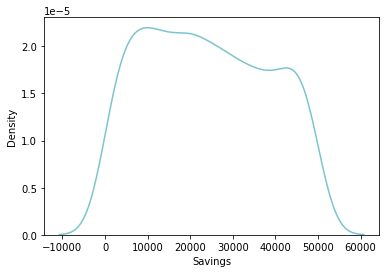

In [118]:
#Normality Assesment
sb.kdeplot(x=df['Savings'],color="#7AC5CD")

<AxesSubplot:xlabel='Savings', ylabel='ProbabilityOfCarPurchase'>

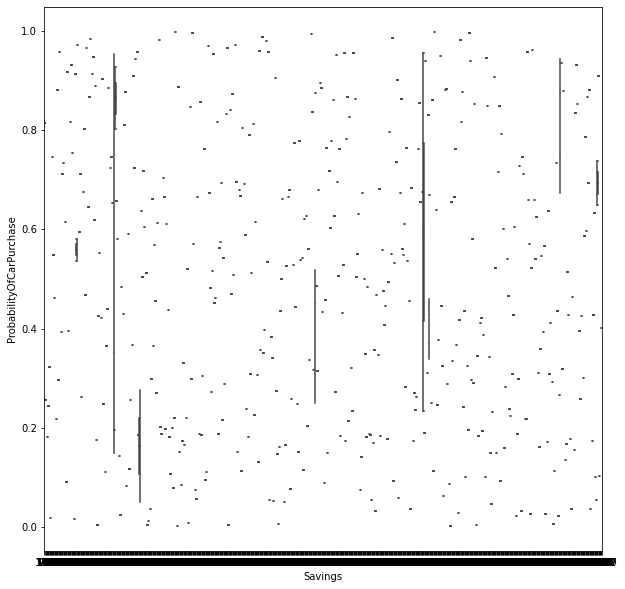

In [119]:
mtplt.figure(figsize=(10,10))
sb.boxplot(x=df['Savings'],y=df['ProbabilityOfCarPurchase'])

<AxesSubplot:xlabel='Savings', ylabel='ProbabilityOfCarPurchase'>

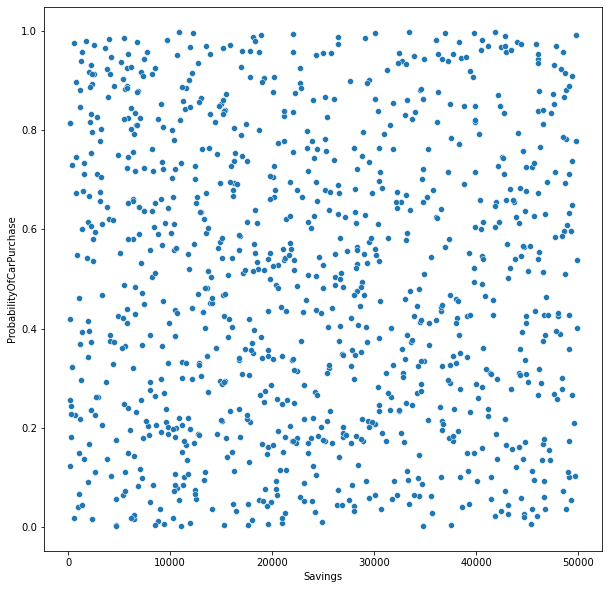

In [120]:
mtplt.figure(figsize=(10,10))
sb.scatterplot(x=df['Savings'],y=df['ProbabilityOfCarPurchase'])

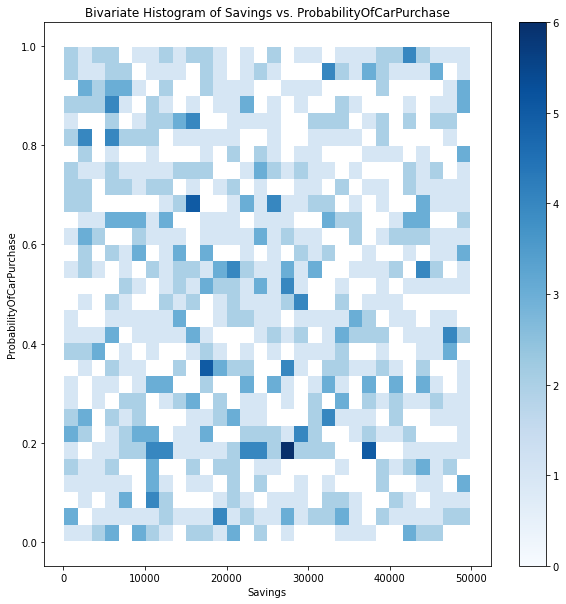

In [121]:
mtplt.figure(figsize=(10, 10))
sb.histplot(x=df['Savings'], y=df['ProbabilityOfCarPurchase'], bins=30, cmap='Blues', cbar=True)
mtplt.title('Bivariate Histogram of Savings vs. ProbabilityOfCarPurchase')
mtplt.xlabel('Savings')
mtplt.ylabel('ProbabilityOfCarPurchase')
mtplt.show()

<AxesSubplot:title={'center':'Frequency graph of Savings'}, xlabel='Savings', ylabel='Frequency'>

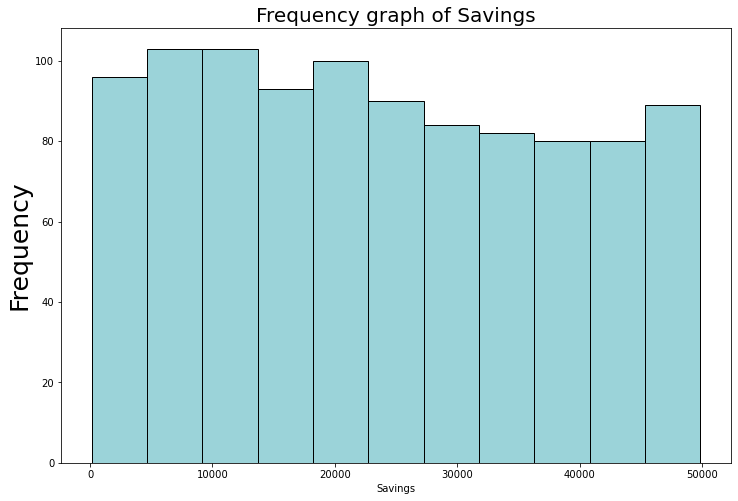

In [122]:
#Historgram plot for Company Rating and its frequencies
mtplt.figure(figsize=(12,8))
mtplt.ylabel('Frequency', fontsize=25)
mtplt.title('Frequency graph of Savings', fontsize=20)
sb.histplot(x=df['Savings'],color='#7AC5CD')

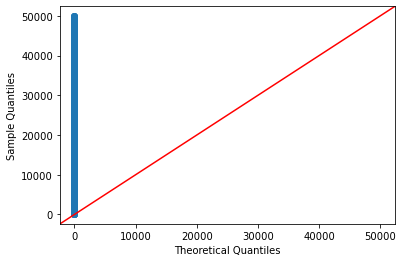

In [123]:
stm.qqplot(df['Savings'], line ='45')
mtplt.show()

In [124]:
print(df['Savings'].skew())

0.12094590370321127


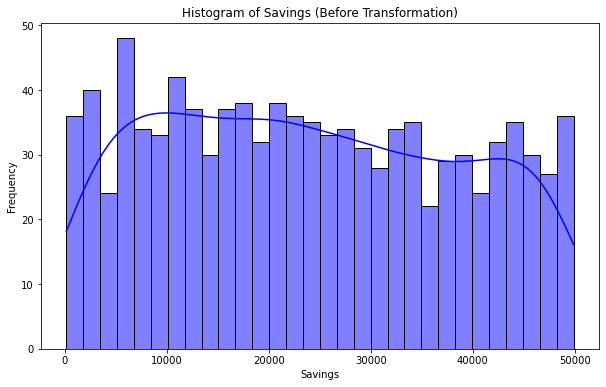

In [125]:
mtplt.figure(figsize=(10, 6))
sb.histplot(df['Savings'], bins=30, kde=True, color='blue')
mtplt.title('Histogram of Savings (Before Transformation)')
mtplt.xlabel('Savings')
mtplt.ylabel('Frequency')
mtplt.show()

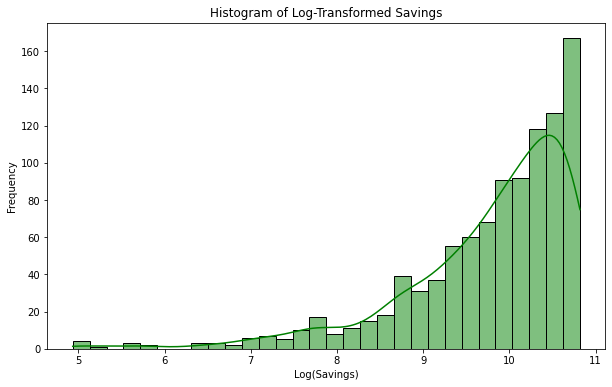

In [126]:
# Apply a logarithmic transformation to 'Savings'
df['Savings_log'] = np.log1p(df['Savings'])

# Visualize the distribution after transformation
mtplt.figure(figsize=(10, 6))
sb.histplot(df['Savings_log'], bins=30, kde=True, color='green')
mtplt.title('Histogram of Log-Transformed Savings')
mtplt.xlabel('Log(Savings)')
mtplt.ylabel('Frequency')
mtplt.show()

In [127]:
# Calculate skewness after transformation
skewness_savings_log = df['Savings_log'].skew()
print(f"Skewness after Log Transformation: {skewness_savings_log}")

Skewness after Log Transformation: -1.7123664796625075


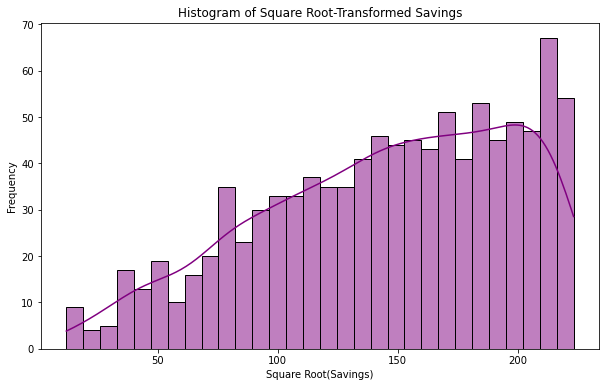

Skewness after Square Root Transformation: -0.45556680224655577


In [128]:
# Apply a square root transformation to 'Savings'
df['Savings_sqrt'] = np.sqrt(df['Savings'])

# Visualize the distribution after square root transformation
mtplt.figure(figsize=(10, 6))
sb.histplot(df['Savings_sqrt'], bins=30, kde=True, color='purple')
mtplt.title('Histogram of Square Root-Transformed Savings')
mtplt.xlabel('Square Root(Savings)')
mtplt.ylabel('Frequency')
mtplt.show()

# Calculate skewness after square root transformation
skewness_savings_sqrt = df['Savings_sqrt'].skew()
print(f"Skewness after Square Root Transformation: {skewness_savings_sqrt}")


# *************Code added in final draft************************************

  Data Analysis on additional factors that might influence car purchasing decisions

# Influence of YearsInCurrentJob variable on car purchase

In [149]:
df['YearsInCurrentJob'].unique()

array([ 7, 10,  4,  9,  2,  5,  1,  6,  3,  8])

<AxesSubplot:xlabel='YearsInCurrentJob', ylabel='Density'>

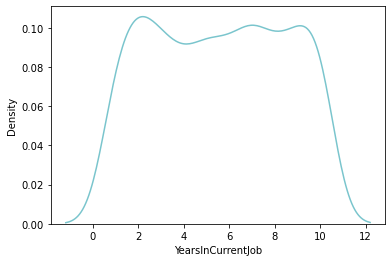

In [150]:
#Normality Assesment
sb.kdeplot(x=df['YearsInCurrentJob'],color="#7AC5CD")



In the above normality assessment curve we can clearly observe that the peak is found on 2.That means majority of the people are the ones who are in the job for 2 years.

In [164]:

df['YearsInCurrentJob'].min()






1

In [165]:
df['YearsInCurrentJob'].max()

10

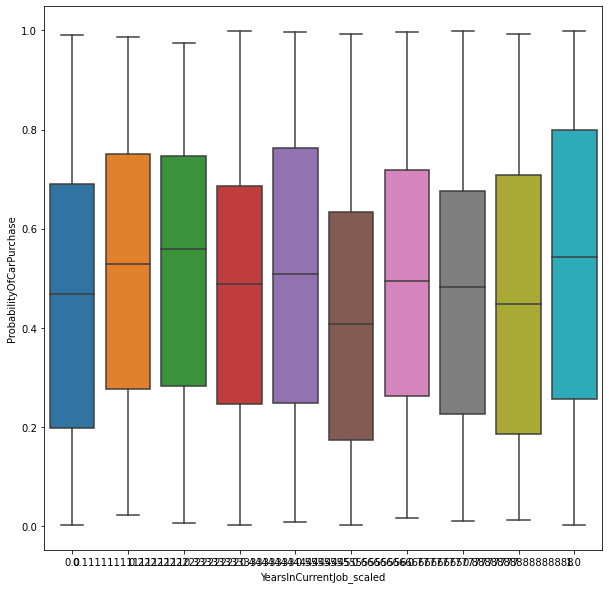

In [153]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to avoid modifying the original data
df_filtered = df.copy()

# Scale the 'Debt' values
scaler = MinMaxScaler()
df_filtered['YearsInCurrentJob_scaled'] = scaler.fit_transform(df_filtered[['YearsInCurrentJob']])

# Remove missing values, if any
df_filtered = df_filtered.dropna(subset=['YearsInCurrentJob_scaled', 'ProbabilityOfCarPurchase'])

# Create boxplot
mtplt.figure(figsize=(10, 10))
sb.boxplot(x=df_filtered['YearsInCurrentJob_scaled'], y=df_filtered['ProbabilityOfCarPurchase'])
mtplt.show()



A visual representation of the variation in the "ProbabilityOfCarPurchase" for different estimates of "YearsInCurrentJob" can be obtained from the boxplot.A comprehension of the central tendency and spread of the 'ProbabilityOfCarPurchase' distribution for each 'YearsInCurrentJob' group may be acquired from the positioning of the median line, the length of the box, and the existence of outliers.

So this box plot depicts clearly on this quartile

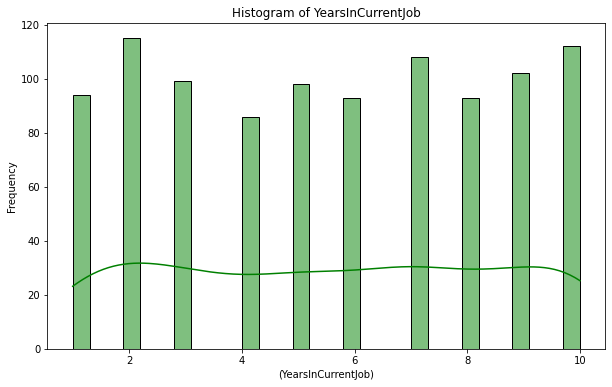

In [167]:



mtplt.figure(figsize=(10, 6))
sb.histplot(df['YearsInCurrentJob'], bins=30, kde=True, color='green')
mtplt.title('Histogram of YearsInCurrentJob')
mtplt.xlabel('(YearsInCurrentJob)')
mtplt.ylabel('Frequency')
mtplt.show()




The above frequency graph shows the count of people who are having that many years in hand in the current job

<AxesSubplot:xlabel='YearsInCurrentJob', ylabel='ProbabilityOfCarPurchase'>

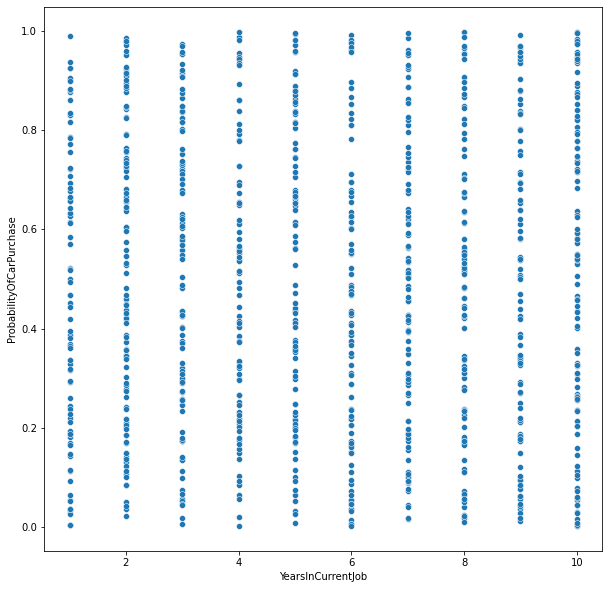

In [155]:

mtplt.figure(figsize=(10,10))
sb.scatterplot(x=df['YearsInCurrentJob'],y=df['ProbabilityOfCarPurchase'])




The above scaterplot provide an insight on how the data is distributed acorss these years.

<AxesSubplot:title={'center':'Frequency graph of YearsInCurrentJob'}, xlabel='YearsInCurrentJob', ylabel='Frequency'>

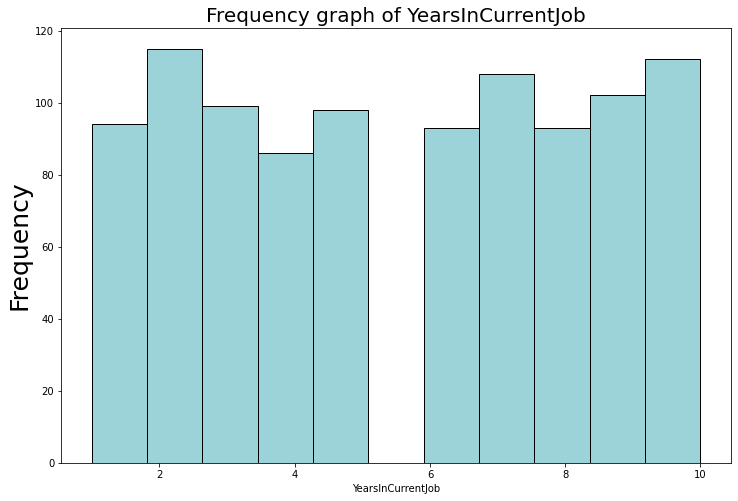

In [168]:

mtplt.figure(figsize=(12,8))
mtplt.ylabel('Frequency', fontsize=25)
mtplt.title('Frequency graph of YearsInCurrentJob', fontsize=20)
sb.histplot(x=df['YearsInCurrentJob'],color='#7AC5CD')



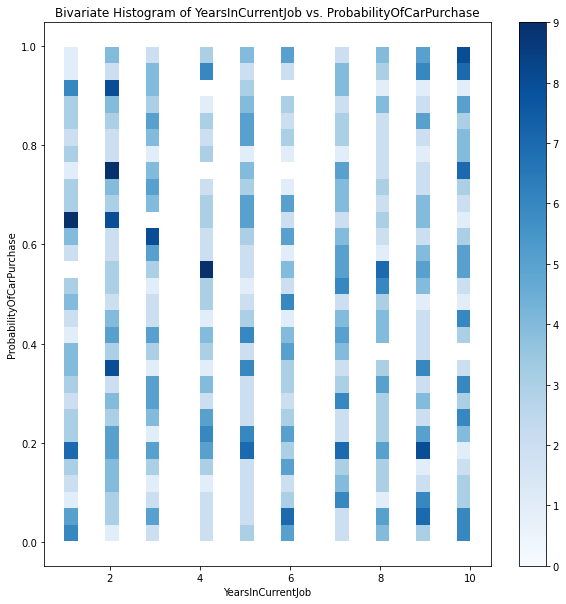

In [157]:


mtplt.figure(figsize=(10, 10))
sb.histplot(x=df['YearsInCurrentJob'], y=df['ProbabilityOfCarPurchase'], bins=30, cmap='Blues', cbar=True)
mtplt.title('Bivariate Histogram of YearsInCurrentJob vs. ProbabilityOfCarPurchase')
mtplt.xlabel('YearsInCurrentJob')
mtplt.ylabel('ProbabilityOfCarPurchase')
mtplt.show()




This bivariate graph shows the density of the distribution.As the darker color shows the highest density areas pf accumulation

In [158]:

df['YearsInCurrentJob'].mean()


5.551

In [159]:
df['YearsInCurrentJob'].median()


6.0

In [160]:
df['YearsInCurrentJob'].std()



2.91889001487191

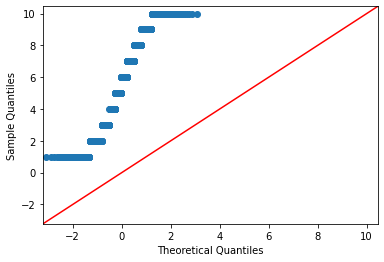

In [161]:
stm.qqplot(df['YearsInCurrentJob'], line ='45')
mtplt.show()



The above graph shows how skewness and how it aligns to the cnteral tendendcy line.

In [162]:

print(df['YearsInCurrentJob'].skew())

-0.009664646667599175


a skewness value of -0.009664646667599175 is very close to zero, suggesting a nearly symmetrical distribution. While not perfectly symmetrical, the deviation is small, and the distribution is relatively balanced.

# Model Construction

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd  # Import pandas with correct alias

# Load the dataset
df1 = pd.read_csv("//Users//tejaswinienugala//Desktop//updated_car_purchase_dataset.csv")

# Feature selection - Choose relevant features based on the dataset
features = ['Age', 'Debt', 'HouseholdSize', 'Savings']

# Target variable
target = 'ProbabilityOfCarPurchase'  # Assuming this column is present in the dataset

# Create a binary label based on a threshold (adjust the threshold as needed)
threshold = 0.5
df1['TargetLabel'] = (df1[target] >= threshold).astype(int)

# Select features and adjusted target variable
X = df1[features]
y = df1['TargetLabel']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')




Accuracy: 0.5
Confusion Matrix:
[[54 55]
 [45 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       109
           1       0.46      0.51      0.48        91

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



The accuracy of the model on the test set is shown by an accuracy of 0.5.With an accuracy of 0.5, which is comparable to random guessing, the model is generating predictions at randomly chosen or less accurate and could be improved.

The information new_customer_data in this example is being created with fictitious values for the new consumer. Next, we use the same scaler that we used for training to normalize this data. Lastly, we forecast whether or not the new consumer is going to buy an automobile using the trained logistic regression model.

In [133]:
# Example data for a new customer
new_customer_data = pd.DataFrame({
    'Age': [35],
    'Debt': [15000],
    'HouseholdSize': [3],
    'Savings': [20000]
})

# Standardize the data using the same scaler used for training
new_customer_data_scaled = scaler.transform(new_customer_data)

# Make predictions using the trained model
prediction = model.predict(new_customer_data_scaled)

print(f'Prediction for the new customer: {prediction}')


Prediction for the new customer: [0]


model predicts the new customer which is mentioned above are not likely to purchase a car.

In order to improve the accuracy we have decided to try random forest model to determine the car purchase prediction.

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df2 = pd.read_csv("//Users//tejaswinienugala//Desktop//updated_car_purchase_dataset.csv")

# Feature selection 
features = ['Age', 'Debt', 'HouseholdSize', 'Savings']

# Target variable
target = 'ProbabilityOfCarPurchase'

# Select features and target variable
X = df2[features]
y = (df2[target] >= 0.5).astype(int)  # Create binary label based on threshold

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')


Random Forest Accuracy: 0.475
Random Forest Confusion Matrix:
[[54 55]
 [50 41]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       109
           1       0.43      0.45      0.44        91

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200



Actually after trying random forest we can clearly see that there is no improvement in accuracy so we decided to finetune it and try it out again.

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("//Users//tejaswinienugala//Desktop//updated_car_purchase_dataset.csv")

# Feature selection
features = ['Age', 'Debt', 'HouseholdSize', 'Savings']

# Target variable
target = 'ProbabilityOfCarPurchase'

# Select features and target variable
X = df[features]
y = (df[target] >= 0.5).astype(int)  # Create binary label based on threshold

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model with GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Random Forest model with the best hyperparameters
model_rf = RandomForestClassifier(random_state=42, **best_params)
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')
print(f'Best Hyperparameters: {best_params}')


Random Forest Accuracy: 0.525
Random Forest Confusion Matrix:
[[58 51]
 [44 47]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       109
           1       0.48      0.52      0.50        91

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.53       200

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


Better overall predictive performance is indicated by the model's accuracy, which has grown from the prior value of 0.475 to 0.525.The adjusted Random Forest model's accuracy has increased throughout the first few iterations, indicating that the chosen hyperparameters lead to more accurate predictions overall.

# Testing The model with several scenarios

In [144]:


# Random examples data for features
random_examples = np.array([[30, 5000, 3, 2000],
                            [45, 10000, 5, 5000],
                            [25, 2000, 2, 1000]])

# Standardize the features for the random examples using the same scaler from training
scaler = StandardScaler()
random_examples_scaled = scaler.fit_transform(random_examples)

# Make predictions on random examples
for i, example_data in enumerate(random_examples_scaled):
    example_data = example_data.reshape(1, -1)
    prediction = model.predict(example_data)
    print(f"Example {i + 1}: Predicted Probability of Car Purchase: {prediction[0]}")


Example 1: Predicted Probability of Car Purchase: 0
Example 2: Predicted Probability of Car Purchase: 1
Example 3: Predicted Probability of Car Purchase: 0


Above are few test scenarios where it is expected to tell the prediction.0 indicates they are unlikel to buy and 1 indicates they tend to buy